In [2]:
import statsmodels.api as sm
import pandas as pd

# Load stock data
stock_data = pd.read_excel('/content/Predicted returns excel example.xlsx', parse_dates=True)

# Rename 'Unnamed: 0' to 'Date' and set as index
stock_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Function to process each stock
def process_stock(stock_name):
    # Calculate Excess Returns (r_s - r_f)
    stock_data[f'{stock_name}_excess'] = stock_data[stock_name] - stock_data['RF']

    # Prepare explanatory variables
    X = stock_data[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Add constant for alpha

    # Dependent variable
    Y = stock_data[f'{stock_name}_excess']

    # Fit regression model
    model = sm.OLS(Y, X).fit()

    # Predicted returns
    stock_data[f'predicted_excess_{stock_name}'] = model.predict(X)

    # Tracking Error
    stock_data[f'tracking_error_{stock_name}'] = (
        stock_data[f'{stock_name}_excess'] - stock_data[f'predicted_excess_{stock_name}']
    )

    # Prepare data for Excel export
    excel_data = stock_data[
        [f'{stock_name}_excess', f'predicted_excess_{stock_name}', f'tracking_error_{stock_name}']
    ].copy()
    excel_data.columns = ['Stock Returns', 'Predicted Returns', 'Tracking Error']

    # Reset index
    excel_data = excel_data.reset_index()

    # Save to Excel
    excel_file_path = f"{stock_name}_returns_analysis.xlsx"
    excel_data.to_excel(excel_file_path, index=False)
    print(f"Excel file created for {stock_name}: {excel_file_path}")

    return model

# Process each stock (XOM, Mkt-RF, SMB, HML)
models = {}
for stock in ['XOM', 'Mkt-RF', 'SMB', 'HML']:
    print(f"\nProcessing {stock}...")
    models[stock] = process_stock(stock)



Processing XOM...
Excel file created for XOM: XOM_returns_analysis.xlsx

Processing Mkt-RF...
Excel file created for Mkt-RF: Mkt-RF_returns_analysis.xlsx

Processing SMB...
Excel file created for SMB: SMB_returns_analysis.xlsx

Processing HML...
Excel file created for HML: HML_returns_analysis.xlsx


In [6]:
# Display regression summary for XOM
print(models['XOM'].summary())


                            OLS Regression Results                            
Dep. Variable:             XOM_excess   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.02e-12
Time:                        18:07:19   Log-Likelihood:                -323.04
No. Observations:                 119   AIC:                             654.1
Df Residuals:                     115   BIC:                             665.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5791      0.363     -1.596      0.1

In [7]:
# Display regression summary for Mkt-RF
print(models['Mkt-RF'].summary())

                            OLS Regression Results                            
Dep. Variable:          Mkt-RF_excess   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.339e+05
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.85e-217
Time:                        18:07:57   Log-Likelihood:                 188.68
No. Observations:                 119   AIC:                            -369.4
Df Residuals:                     115   BIC:                            -358.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.005     -5.856      0.0

In [8]:
# Display regression summary for SMB
print(models['SMB'].summary())

                            OLS Regression Results                            
Dep. Variable:             SMB_excess   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.006e+04
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.25e-193
Time:                        18:08:11   Log-Likelihood:                 188.68
No. Observations:                 119   AIC:                            -369.4
Df Residuals:                     115   BIC:                            -358.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.005     -5.856      0.0

In [9]:
# Display regression summary for HML
print(models['HML'].summary())

                            OLS Regression Results                            
Dep. Variable:             HML_excess   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.736e+04
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          7.13e-193
Time:                        18:08:17   Log-Likelihood:                 188.68
No. Observations:                 119   AIC:                            -369.4
Df Residuals:                     115   BIC:                            -358.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.005     -5.856      0.0

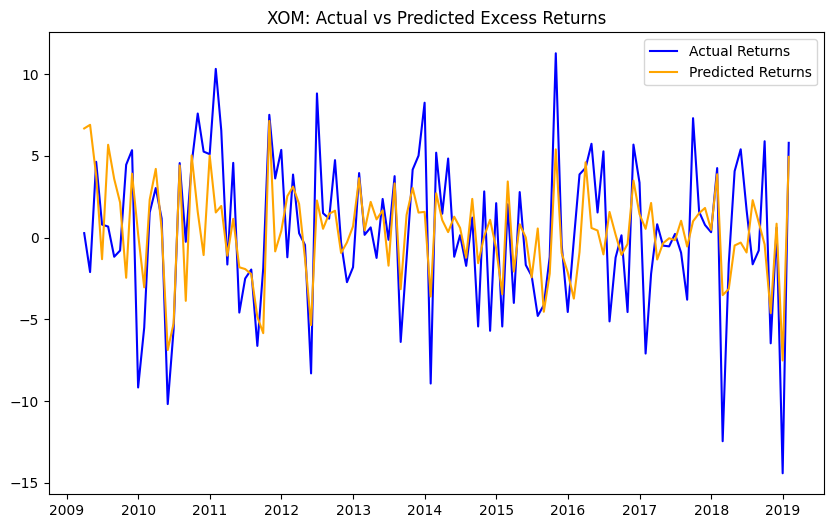

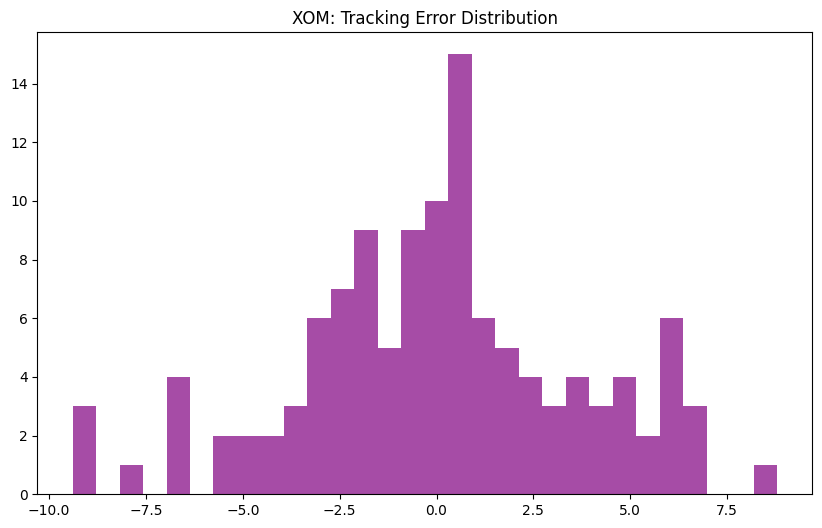

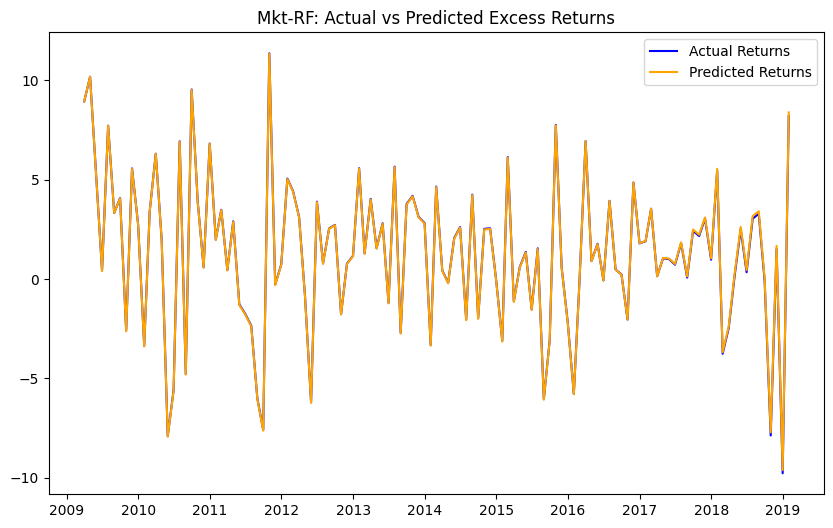

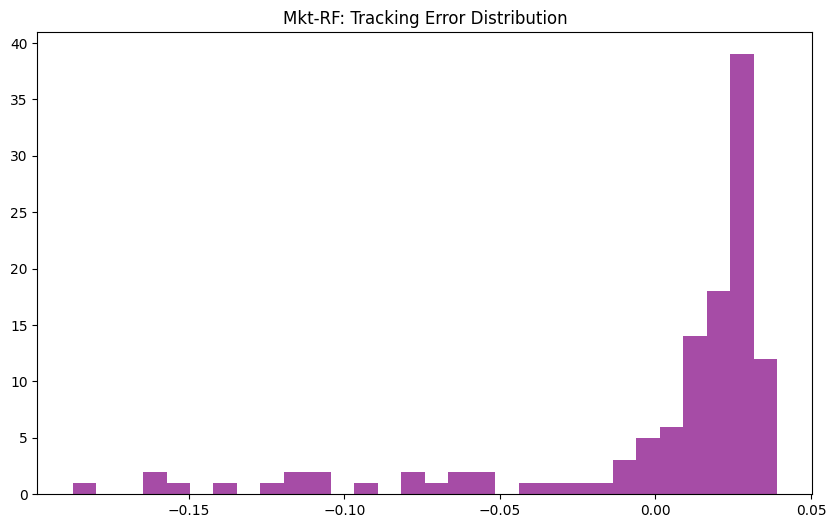

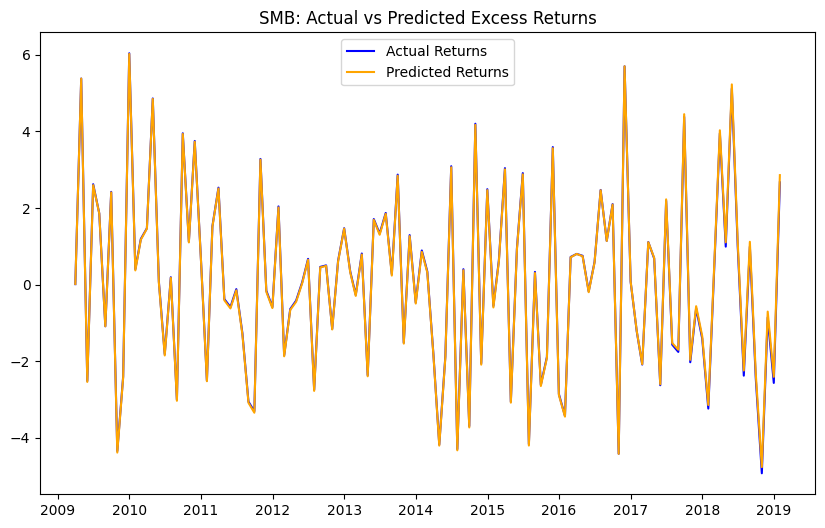

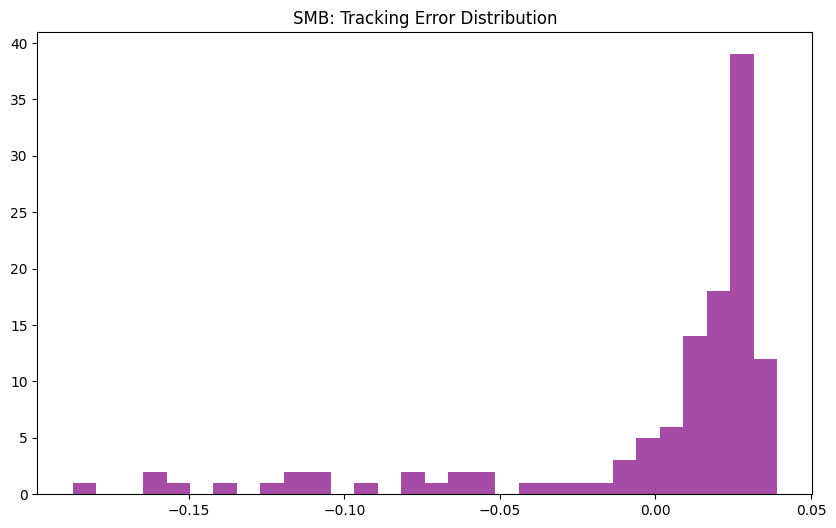

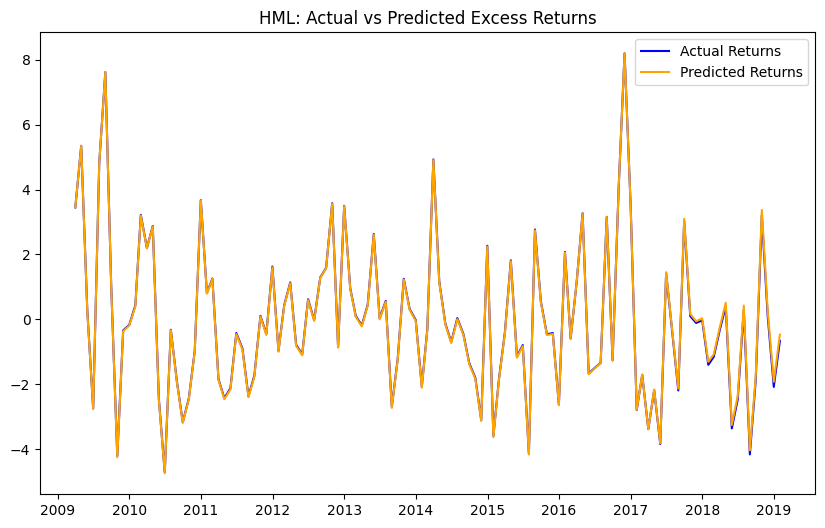

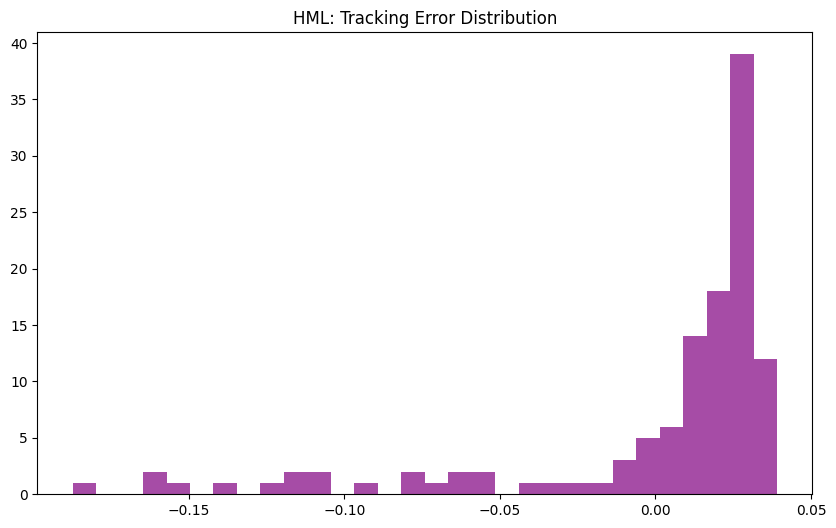

In [4]:
import matplotlib.pyplot as plt

def plot_results(stock_name):
    # Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data[f'{stock_name}_excess'], label='Actual Returns', color='blue')
    plt.plot(stock_data.index, stock_data[f'predicted_excess_{stock_name}'], label='Predicted Returns', color='orange')
    plt.title(f'{stock_name}: Actual vs Predicted Excess Returns')
    plt.legend()
    plt.savefig(f'{stock_name}_actual_vs_predicted.png')
    plt.show()

    # Tracking Error
    plt.figure(figsize=(10, 6))
    plt.hist(stock_data[f'tracking_error_{stock_name}'], bins=30, color='purple', alpha=0.7)
    plt.title(f'{stock_name}: Tracking Error Distribution')
    plt.savefig(f'{stock_name}_tracking_error.png')
    plt.show()

# Generate plots for each stock
for stock in ['XOM', 'Mkt-RF', 'SMB', 'HML']:
    plot_results(stock)
